# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 5</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

### Exercise 5.1

The aim of lesson five is to implement a Metropolis algorithm code to sample the probability density $|\Psi(\vec{r},t)|^2$ of a non-relativistic spinless electron of hydrogen atom in the ground state ( $\Psi_{1,0,0}(r,\theta,\phi)$ ) and in $2p$ excited state ( $\Psi_{2,1,0}(r,\theta,\phi)$ ) in cartesian coordinate.

Below are reported pictures of estimations of  $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties (calculated with blocking method) in Bohr radius units, as a function of the number of blocks.
Results are obtained using an uniform transition probability $T(\vec{x}|\vec{y})$ with a step chosen in order to obtain 50% of acceptance.

For this simulation I chose to use $100$ steps of equilibration (this should be a safe choice, see below), $100$ blocks of $50$ steps and a starting point of $(1,1,1)$, that results in a distance from the origin close to equilibrium value.

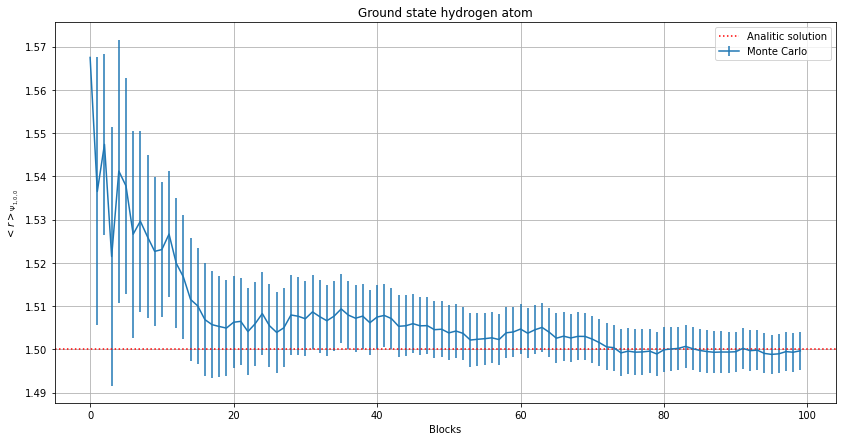

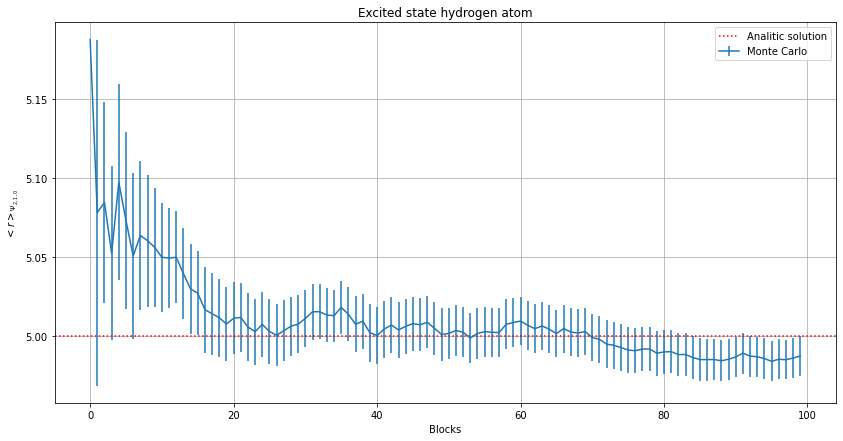

In [24]:
plt.figure(1, figsize = (14, 7))
y_1s, yerr_1s = np.loadtxt("../results/average_radius_100_state.dat", delimiter = " ", unpack = True)
blocks = np.arange(0,100)

plt.title("Ground state hydrogen atom")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{1,0,0}}$')
plt.axhline(y=1.5, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(blocks, y_1s, yerr_1s, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (14, 7))
y_2p, yerr_2p = np.loadtxt("../results/average_radius_210_state.dat", delimiter = " ", unpack = True)

plt.title("Excited state hydrogen atom")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{2,1,0}}$')
plt.axhline(y=5, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(blocks, y_2p, yerr_2p, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.show()

Results obtained seem to be compatible with expectations value of $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$ (remember that $a_0=1$ because we are using Bohr radius units).

#### What happens if we start very far from the origin?

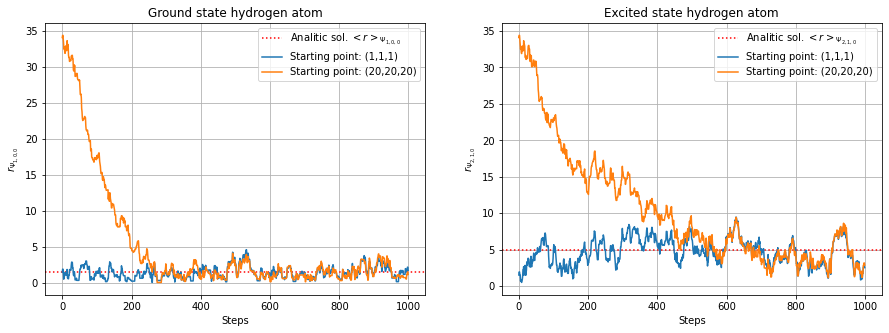

In [47]:
steps = np.arange(0,1000)
y_1s_near = np.loadtxt("../results/test_start_near_from_origin_100_state.dat", delimiter = " ", unpack = True)
y_1s_far = np.loadtxt("../results/test_start_far_from_origin_100_state.dat", delimiter = " ", unpack = True)
y_2p_near = np.loadtxt("../results/test_start_near_from_origin_210_state.dat", delimiter = " ", unpack = True)
y_2p_far = np.loadtxt("../results/test_start_far_from_origin_210_state.dat", delimiter = " ", unpack = True)

plt.figure(figsize=(15,5))
plt.subplot(121)

plt.axhline(y=1.5, color='r', linestyle="dotted", label = "Analitic sol. $< r >_{\Psi_{1,0,0}}$")
plt.plot(steps, y_1s_near, label = "Starting point: (1,1,1)")
plt.plot(steps, y_1s_far, label = "Starting point: (20,20,20)")

plt.title("Ground state hydrogen atom")
plt.xlabel('Steps')
plt.ylabel('$ r _{\Psi_{1,0,0}}$')
plt.grid(True)
plt.legend()

plt.subplot(122)

plt.axhline(y=5, color='r', linestyle="dotted", label = "Analitic sol. $< r >_{\Psi_{2,1,0}}$")
plt.plot(steps, y_2p_near, label = "Starting point: (1,1,1)")
plt.plot(steps, y_2p_far, label = "Starting point: (20,20,20)")

plt.title("Excited state hydrogen atom")
plt.xlabel('Steps')
plt.ylabel('$ r _{\Psi_{2,1,0}}$')
plt.grid(True)
plt.legend()

plt.show()

Starting far from the origin results in having longer equilibration time.
In the example above we can observe that in the case of starting point $(1,1,1)$ (the case of the previous simulation) we don't observe a visible out-of-equilibrium transient and $100$ steps of equilibration are surely enough.
In the case of starting point $(20,20,20)$ we need at least $300$ equilibration steps for the ground state and $500$ equilibration steps for the excited state.

#### How large should be the number of Monte Carlo Metropolis steps in each block?